In [4]:

# HR Employee Attrition Analysis

# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Setup styles
plt.style.use("seaborn-v0_8-whitegrid")
sns.set_palette("coolwarm")

In [8]:
#Load Dataset
df = pd.read_csv(r'C:\Users\paisa\Downloads\HR_Employee_Attrition.csv', encoding='latin1')
print("Data Loaded Successfully!")
print(df.shape)
df.head()

Data Loaded Successfully!
(1470, 35)


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [9]:
# Clean column names
df.columns = df.columns.str.strip().str.replace(' ', '').str.lower()

# Check for missing values
print("\nMissing Values in Each Column:")
print(df.isnull().sum())

# Basic Info
print("\nDataset Info:")
print(df.info())

# Replace Attrition text values with numeric for some analysis
df['attrition_flag'] = df['attrition'].apply(lambda x: 1 if x == 'Yes' else 0)



Missing Values in Each Column:
age                         0
attrition                   0
businesstravel              0
dailyrate                   0
department                  0
distancefromhome            0
education                   0
educationfield              0
employeecount               0
employeenumber              0
environmentsatisfaction     0
gender                      0
hourlyrate                  0
jobinvolvement              0
joblevel                    0
jobrole                     0
jobsatisfaction             0
maritalstatus               0
monthlyincome               0
monthlyrate                 0
numcompaniesworked          0
over18                      0
overtime                    0
percentsalaryhike           0
performancerating           0
relationshipsatisfaction    0
standardhours               0
stockoptionlevel            0
totalworkingyears           0
trainingtimeslastyear       0
worklifebalance             0
yearsatcompany              0
yearsinc

In [44]:
#Average income by department
df.groupby('department')['monthlyincome'].mean()

department
Human Resources           6654.507937
Research & Development    6281.252862
Sales                     6959.172646
Name: monthlyincome, dtype: float64

In [45]:
#Count of employees by department
df.groupby('department')['attrition'].count()

department
Human Resources            63
Research & Development    961
Sales                     446
Name: attrition, dtype: int64

In [46]:
#Attrition rate by department
attrition_rate = df.groupby('department')['attrition'].apply(lambda x: (x=='Yes').mean() * 100)
print(attrition_rate)

department
Human Resources           19.047619
Research & Development    13.839750
Sales                     20.627803
Name: attrition, dtype: float64


In [7]:
#Multiple groupby columns
df.groupby(['department', 'gender'])['monthlyincome'].mean()

department              gender
Human Resources         Female    7264.000000
                        Male      6371.023256
Research & Development  Female    6513.691293
                        Male      6129.888316
Sales                   Female    6972.126984
                        Male      6949.645914
Name: monthlyincome, dtype: float64

In [50]:
#Basic Statistics
# Summary statistics
df.describe()

,age,dailyrate,distancefromhome,education,employeecount,employeenumber,environmentsatisfaction,hourlyrate,jobinvolvement,joblevel,jobsatisfaction,monthlyincome,monthlyrate,numcompaniesworked,percentsalaryhike,performancerating,relationshipsatisfaction,standardhours,stockoptionlevel,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearsincurrentrole,yearssincelastpromotion,yearswithcurrmanager,attrition_flag
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129,0.161224
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136,0.367863
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000,0.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000,0.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000,0.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000,1.000000


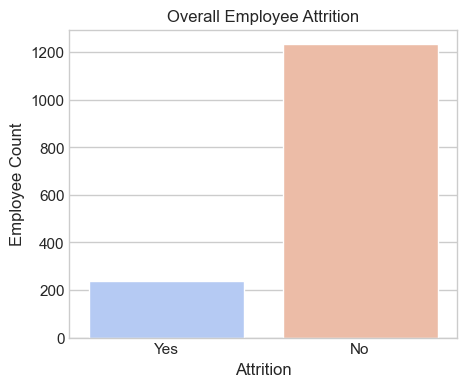

Overall Attrition Rate: 16.12%


In [51]:
#Overall Attrition
plt.figure(figsize=(5,4))
sns.countplot(data=df, x='attrition', hue='attrition', palette='coolwarm', legend=False)
plt.title('Overall Employee Attrition')
plt.xlabel('Attrition')
plt.ylabel('Employee Count')
plt.show()

# Calculate attrition rate
attrition_rate = df['attrition_flag'].mean() * 100
print(f"Overall Attrition Rate: {attrition_rate:.2f}%")

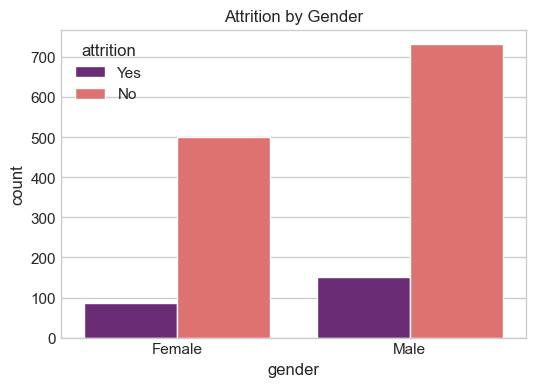

In [52]:
#Attrition by Gender
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='gender', hue='attrition', palette='magma')
plt.title('Attrition by Gender')
plt.show()

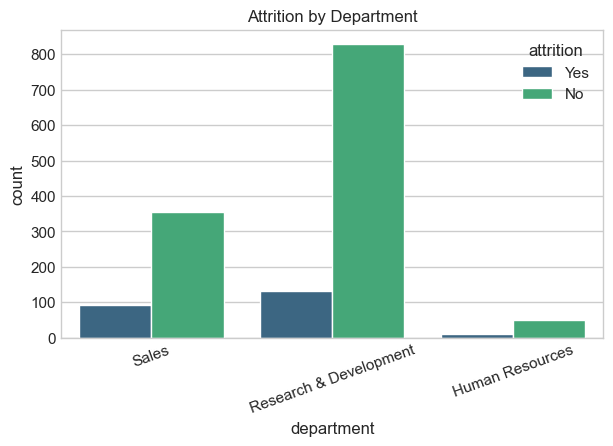

In [53]:
#Attrition by Department
plt.figure(figsize=(7,4))
sns.countplot(data=df, x='department', hue='attrition', palette='viridis')
plt.title('Attrition by Department')
plt.xticks(rotation=20)
plt.show()

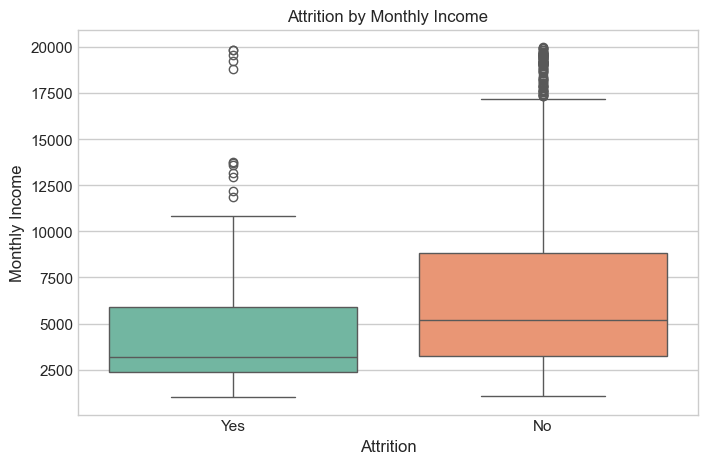

In [55]:
#Attrition by Monthly Income
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='attrition', y='monthlyincome', hue='attrition', palette='Set2', legend=False)
plt.title('Attrition by Monthly Income')
plt.xlabel('Attrition')
plt.ylabel('Monthly Income')
plt.show()

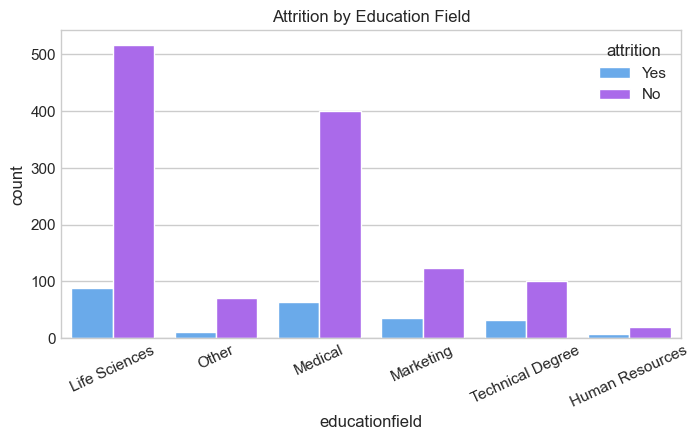

In [56]:
#Attrition by Education Field
plt.figure(figsize=(8,4))
sns.countplot(data=df, x='educationfield', hue='attrition', palette='cool')
plt.title('Attrition by Education Field')
plt.xticks(rotation=25)
plt.show()

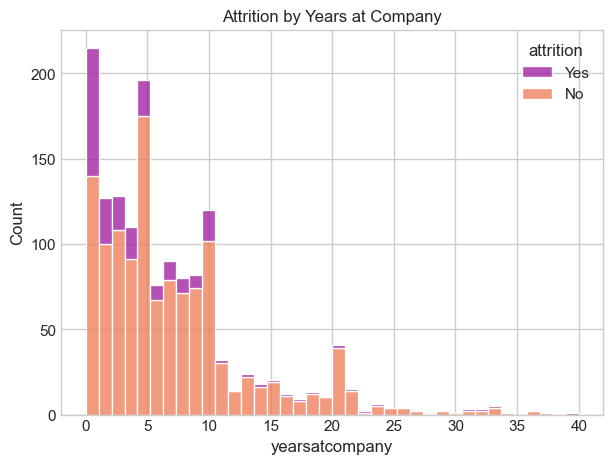

In [57]:
#Attrition by Years at Company
plt.figure(figsize=(7,5))
sns.histplot(data=df, x='yearsatcompany', hue='attrition', multiple='stack', palette='plasma')
plt.title('Attrition by Years at Company')
plt.show()

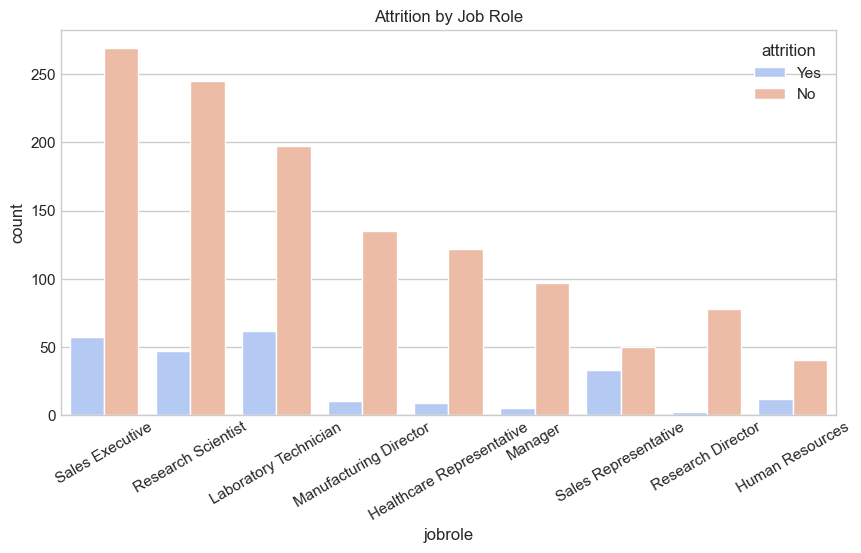

In [58]:
#Attrition by Job Role
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='jobrole', hue='attrition', palette='coolwarm')
plt.title('Attrition by Job Role')
plt.xticks(rotation=30)
plt.show()

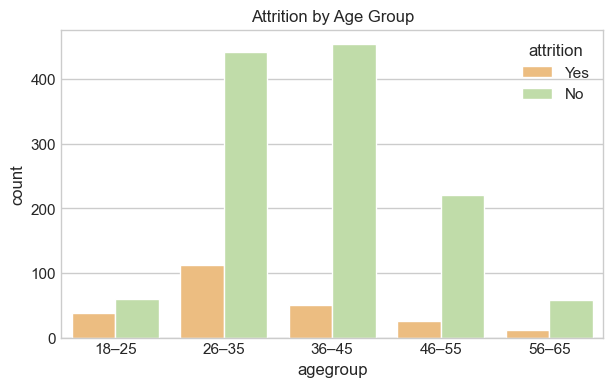

In [59]:
#Attrition by Age Group
bins = [18, 25, 35, 45, 55, 65]
labels = ['18–25', '26–35', '36–45', '46–55', '56–65']
df['agegroup'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

plt.figure(figsize=(7,4))
sns.countplot(data=df, x='agegroup', hue='attrition', palette='Spectral')
plt.title('Attrition by Age Group')
plt.show()

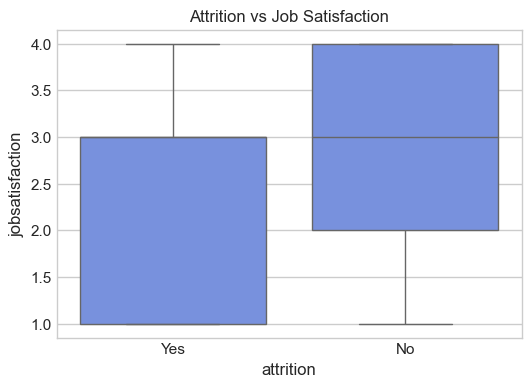

In [62]:
#Job Satisfaction vs Attrition
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x='attrition', y='jobsatisfaction')
plt.title('Attrition vs Job Satisfaction')
plt.show()

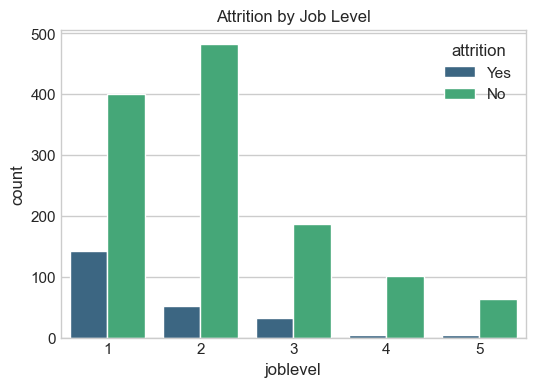

In [63]:
#Attrition by Job Level
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='joblevel', hue='attrition', palette='viridis')
plt.title('Attrition by Job Level')
plt.show()

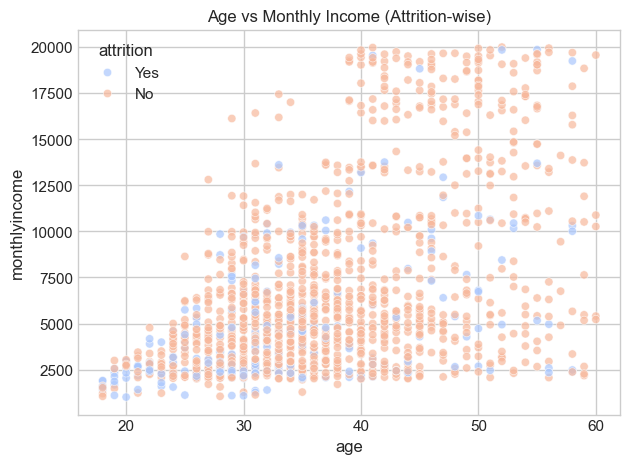

In [64]:
#Age vs Monthly Income
plt.figure(figsize=(7,5))
sns.scatterplot(data=df, x='age', y='monthlyincome', hue='attrition', palette='coolwarm', alpha=0.7)
plt.title('Age vs Monthly Income (Attrition-wise)')
plt.show()

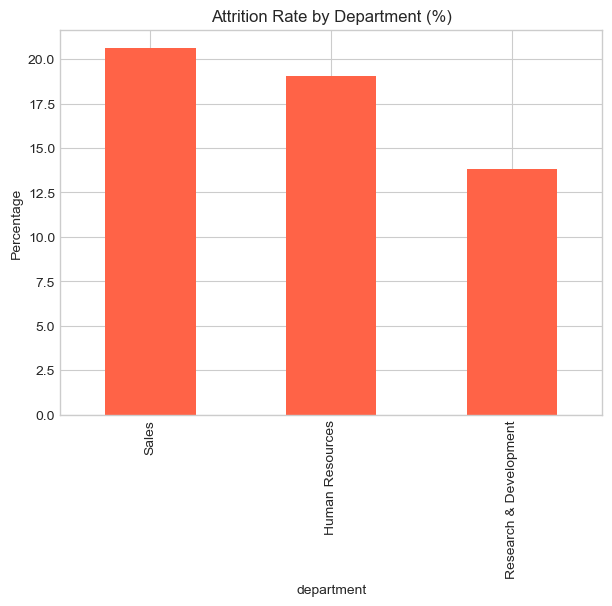

In [10]:
# Attrition Rate by Department (%)
attrition_rate = df.groupby('department')['attrition_flag'].mean()*100
attrition_rate = attrition_rate.sort_values(ascending=False)

plt.figure(figsize=(7,5))
attrition_rate.plot(kind='bar', color='tomato')
plt.title('Attrition Rate by Department (%)')
plt.ylabel('Percentage')
plt.show()

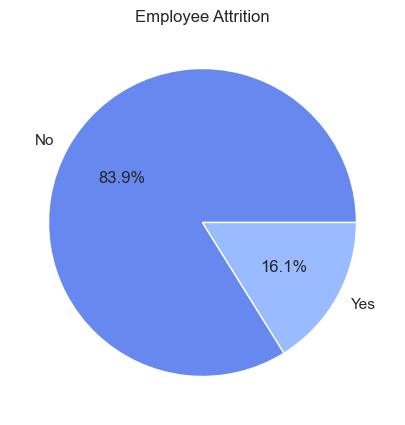

In [67]:
# Simple Pie Chart for Attrition
attrition_counts = df['attrition'].value_counts()

plt.pie(attrition_counts, labels=attrition_counts.index, autopct='%1.1f%%')
plt.title('Employee Attrition')
plt.show()

In [68]:
print("Key Insights from HR Attrition Analysis:\n")
print(f"1️⃣ Overall Attrition Rate: {attrition_rate.mean():.2f}%")
print("2️⃣ Overtime and Low Income have strong correlation with Attrition.")
print("3️⃣ Younger employees (26–35) show higher attrition rates.")
print("4️⃣ Sales Department faces higher attrition compared to R&D.")
print("5️⃣ Employees with fewer years at company tend to leave more often.")
print("6️⃣ Higher job satisfactio and environment satisfaction reduce attrition.")

Key Insights from HR Attrition Analysis:

1️⃣ Overall Attrition Rate: 17.84%
2️⃣ Overtime and Low Income have strong correlation with Attrition.
3️⃣ Younger employees (26–35) show higher attrition rates.
4️⃣ Sales Department faces higher attrition compared to R&D.
5️⃣ Employees with fewer years at company tend to leave more often.
6️⃣ Higher job satisfactio and environment satisfaction reduce attrition.
